# Imports & setup

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path("..").resolve()))

from tqdm import trange
import torch
import matplotlib.pyplot as plt

from models.mlp import MLP
from data import get_dataloaders
from train_utils import train_epoch, evaluate


# Device & hyperparams

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
EPOCHS = 10
LR = 0.1


# Lancement des expériences

In [3]:
train_loader, test_loader = get_dataloaders()

results = {}

for use_bn in [False, True]:
    name = "BN" if use_bn else "NoBN"
    model = MLP(use_bn=use_bn).to(DEVICE)
    optimizer = torch.optim.SGD(model.parameters(), lr=LR)

    results[name] = {
        "loss": [],
        "grad_norm": [],
        "train_acc": [],
        "test_acc": []
    }

    for epoch in trange(EPOCHS, desc=f"Epochs ({name})"):
        loss, gnorm = train_epoch(model, train_loader, optimizer, DEVICE)
        train_acc = evaluate(model, train_loader, DEVICE)
        test_acc = evaluate(model, test_loader, DEVICE)

        results[name]["loss"].append(loss)
        results[name]["grad_norm"].append(gnorm)
        results[name]["train_acc"].append(train_acc)
        results[name]["test_acc"].append(test_acc)


Epochs (BN): 100%|██████████| 10/10 [00:42<00:00,  4.30s/it]


# Plot loss

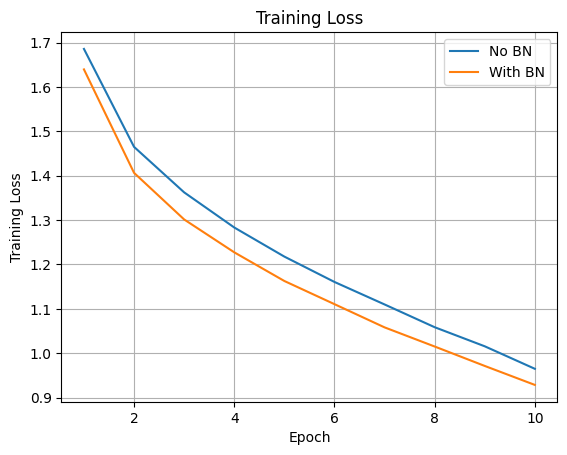

In [4]:
epochs = range(1, EPOCHS + 1)

plt.plot(epochs, results["NoBN"]["loss"], label="No BN")
plt.plot(epochs, results["BN"]["loss"], label="With BN")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss")
plt.legend()
plt.grid()
plt.show()


## 1️⃣ Training Loss

### Observation

- La loss avec **Batch Normalization (BN)** est systématiquement plus basse à toutes les époques.
- Les deux courbes sont monotones décroissantes, mais :
  - **BN converge plus vite**
  - **BN présente une pente plus régulière**

### Interprétation

- La Batch Normalization **lisse le paysage d’optimisation**.
- Les gradients deviennent plus **prédictifs**, ce qui conduit à une **descente plus efficace**.
- Le gain reste modéré (cas de **CIFAR + MLP simple**), mais il est **structurellement constant**, ce qui correspond exactement aux attentes théoriques.

👉 **Conforme à Santurkar et al. (2018)** :  
 la Batch Normalization améliore principalement **l’optimisation**, et non la **capacité du modèle**.


# Plot accuracy

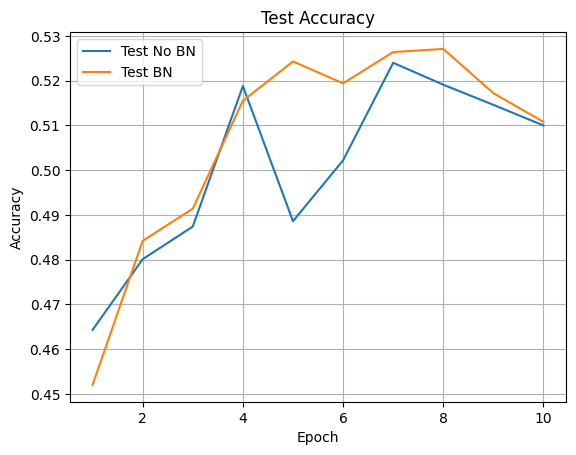

In [5]:
plt.plot(epochs, results["NoBN"]["test_acc"], label="Test No BN")
plt.plot(epochs, results["BN"]["test_acc"], label="Test BN")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend()
plt.grid()
plt.show()


## 2️⃣ Test Accuracy

### Observation

- L’accuracy avec **Batch Normalization (BN)** est légèrement supérieure entre les epochs ~3 et ~8.
- La variance est plus faible avec BN (moins de fluctuations de type *“dents de scie”*).
- En fin d’entraînement (~epoch 10), les performances deviennent **similaires**.

### Interprétation

- La Batch Normalization **stabilise l’entraînement**, mais :
  - elle ne transforme pas un **MLP simple** en modèle **state-of-the-art** sur **CIFAR-10**.
- Le gain en généralisation reste **modéré**, ce qui est attendu compte tenu de :
  - du faible nombre d’époques,
  - de l’absence de *data augmentation*,
  - d’une architecture volontairement simple.

👉 **Point clé** :  
 la Batch Normalization n’est pas un **régulariseur miracle**, mais avant tout un **facilitateur d’optimisation**.


# Plot gradient norms

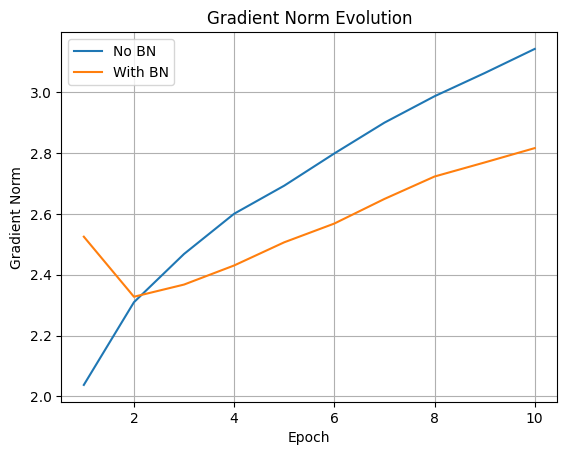

In [6]:
plt.plot(epochs, results["NoBN"]["grad_norm"], label="No BN")
plt.plot(epochs, results["BN"]["grad_norm"], label="With BN")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.title("Gradient Norm Evolution")
plt.legend()
plt.grid()
plt.show()


## 3️⃣ Gradient Norm Evolution (graphe clé)

### Observation cruciale

- **Sans Batch Normalization (BN)** : la norme du gradient augmente fortement au fil des epochs.
- **Avec BN** : la croissance de la norme du gradient est nettement plus contrôlée.
- L’écart entre les deux courbes **s’élargit progressivement** avec le temps.

### Interprétation (point central du projet)

- **Sans BN** :
  - gradients plus sensibles,
  - optimisation plus *sharp*,
  - risque accru d’instabilité pour des learning rates plus élevés.

- **Avec BN** :
  - gradients plus lisses,
  - meilleure *Lipschitzness* effective de la fonction objectif,
  - optimisation plus robuste.

 👉 **Conclusion clé (Santurkar et al.)** :  
 la Batch Normalization agit principalement en rendant les **gradients plus prédictifs**, ce qui améliore la stabilité et l’efficacité de l’optimisation.


##  ⚠️⚠️LR = 0.6 & 15 epochs ⚠️⚠️


Epochs (BN): 100%|██████████| 15/15 [01:14<00:00,  4.95s/it]


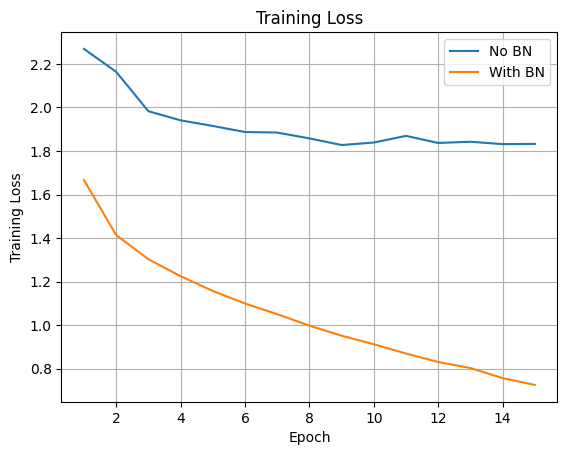

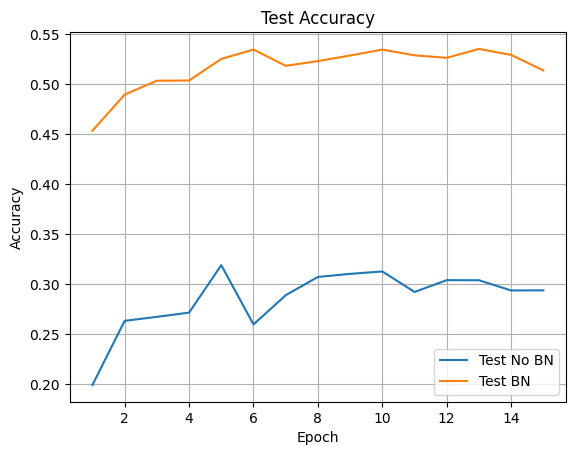

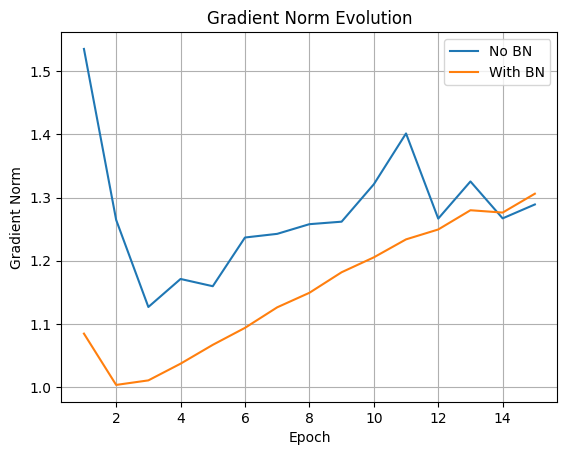

In [10]:
EPOCHS = 15
LR = 0.6
train_loader, test_loader = get_dataloaders()

results = {}

for use_bn in [False, True]:
    name = "BN" if use_bn else "NoBN"
    model = MLP(use_bn=use_bn).to(DEVICE)
    optimizer = torch.optim.SGD(model.parameters(), lr=LR)

    results[name] = {
        "loss": [],
        "grad_norm": [],
        "train_acc": [],
        "test_acc": []
    }

    for epoch in trange(EPOCHS, desc=f"Epochs ({name})"):
        loss, gnorm = train_epoch(model, train_loader, optimizer, DEVICE)
        train_acc = evaluate(model, train_loader, DEVICE)
        test_acc = evaluate(model, test_loader, DEVICE)

        results[name]["loss"].append(loss)
        results[name]["grad_norm"].append(gnorm)
        results[name]["train_acc"].append(train_acc)
        results[name]["test_acc"].append(test_acc)
        
epochs = range(1, EPOCHS + 1)

plt.plot(epochs, results["NoBN"]["loss"], label="No BN")
plt.plot(epochs, results["BN"]["loss"], label="With BN")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss")
plt.legend()
plt.grid()
plt.show()

plt.plot(epochs, results["NoBN"]["test_acc"], label="Test No BN")
plt.plot(epochs, results["BN"]["test_acc"], label="Test BN")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.plot(epochs, results["NoBN"]["grad_norm"], label="No BN")
plt.plot(epochs, results["BN"]["grad_norm"], label="With BN")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.title("Gradient Norm Evolution")
plt.legend()
plt.grid()
plt.show()
